In [1]:
import os
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import time
import math
from tensorflow import keras
import seaborn as sns
import random
import tensorflow as tf
from sklearn.metrics import confusion_matrix

In [2]:
def find_max_wave_height(zdisp_window):
    zero_crossings = np.where(np.diff(np.sign(zdisp_window)))[0]
    zero_crossings= np.append(zero_crossings, len(zdisp_window)-1);
    zero_crossings= np.append(-1,zero_crossings)
    h_wave=np.zeros(len(zero_crossings)-1)
    t_wave=np.zeros(len(zero_crossings)-1)
            
    for iter_zero_crossing in range(len(zero_crossings)-1):
        peak_idx=np.argmax(np.abs(zdisp_window[zero_crossings[iter_zero_crossing]+1:zero_crossings[iter_zero_crossing+1]+1]))
        h_wave[iter_zero_crossing]=zdisp_window[zero_crossings[iter_zero_crossing]+1+peak_idx]
        t_wave[iter_zero_crossing]=zero_crossings[iter_zero_crossing]+1+peak_idx
                
    max_wave_height=max(np.abs(np.diff(h_wave)))
    max_index = int(t_wave[np.argmax(np.abs(np.diff(h_wave)))])
    
    return max_wave_height, max_index

In [3]:
root_folder_rw = os.getcwd()+"/crest_height_g_1p25"
root_folder_norw = os.getcwd()+"/crest_height_g_1p25"

#root_folder="E:/"

window_start_min_rel_to_rw=-25
window_length_in_min=20

samplerate=1.28

rw_idx=round(25*60*samplerate)
start_idx=round((25+window_start_min_rel_to_rw)*60*samplerate)
end_idx=start_idx+round(window_length_in_min*60*samplerate)

rw_dir=root_folder_rw + '/rw_samples'
z_disp_rw=[] 
#z_disp_rw_buoy_067=[] 
for folder in os.listdir(rw_dir):
    print("Processing: " + folder)
        
    start_time = time.time()      
    for file in os.listdir(rw_dir+ "/" + folder):
        if file.endswith(".npz"):
            data=np.load(rw_dir+"/"+ folder+"/"+file)
            z_tmp=data['zdisp'][start_idx:end_idx]
            #print(len(z_tmp))
            significant_wave_height=4*np.std(data['zdisp'])#[start_idx:-1]
            #if folder=='Buoy_067':
            #    z_disp_rw_buoy_067.append(z_tmp/significant_wave_height)
            #else:
#            z_disp_rw.append(z_tmp/significant_wave_height) 
            z_disp_rw.append(z_tmp/significant_wave_height)        
    print("--- %s seconds ---" % (time.time() - start_time))
    
z_disp_norw=[]
#z_disp_norw_buoy_067=[]
norw_dir=root_folder_norw + '/norw_samples'
end_idx=end_idx-start_idx

for folder in os.listdir(norw_dir):
    print("Processing: " + folder)
    start_time = time.time()
  
    for file in os.listdir(norw_dir+ "/" + folder):
        if file.endswith(".npz"):
            data=np.load(norw_dir+"/"+ folder+"/"+file)
            z_tmp=data['zdisp_norw'][0:end_idx]
            #print(len(z_tmp))
            significant_wave_height=4*np.std(data['zdisp_norw'])
            #if folder=='Buoy_067':
            #    z_disp_norw_buoy_067.append(z_tmp/significant_wave_height)
            #else:
#            z_disp_norw.append(z_tmp/significant_wave_height)#/significant_wave_height
            z_disp_norw.append(z_tmp/significant_wave_height)
            if (len(z_disp_norw) > 93175):
                break
                     
    print("--- %s seconds ---" % (time.time() - start_time))

Processing: Buoy_028
--- 5.213036298751831 seconds ---
Processing: Buoy_029
--- 7.4814159870147705 seconds ---
Processing: Buoy_036
--- 6.9314563274383545 seconds ---
Processing: Buoy_043
--- 5.248843431472778 seconds ---
Processing: Buoy_045
--- 5.6796674728393555 seconds ---
Processing: Buoy_067
--- 7.050522089004517 seconds ---
Processing: Buoy_071
--- 5.31497859954834 seconds ---
Processing: Buoy_076
--- 8.913967847824097 seconds ---
Processing: Buoy_081
--- 0.0 seconds ---
Processing: Buoy_087
--- 0.0 seconds ---
Processing: Buoy_088
--- 0.0 seconds ---
Processing: Buoy_089
--- 0.0 seconds ---
Processing: Buoy_090
--- 0.0 seconds ---
Processing: Buoy_091
--- 0.8104486465454102 seconds ---
Processing: Buoy_092
--- 6.254575967788696 seconds ---
Processing: Buoy_093
--- 2.200101613998413 seconds ---
Processing: Buoy_094
--- 4.165099859237671 seconds ---
Processing: Buoy_095
--- 1.1500043869018555 seconds ---
Processing: Buoy_096
--- 2.8491201400756836 seconds ---
Processing: Buoy_097

In [4]:
z_disp_rw=np.vstack(z_disp_rw)
#z_disp_rw_buoy_067=np.vstack(z_disp_rw_buoy_067)
print(z_disp_rw.shape)

z_disp_norw=np.vstack(z_disp_norw)
#z_disp_norw_buoy_067=np.vstack(z_disp_norw_buoy_067)

print(z_disp_norw.shape)

(27252, 1536)
(27252, 1536)


In [5]:
possible_total_waves = round(z_disp_rw.shape[0] + z_disp_norw.shape[0])
print(f"Total possible waves in our study: {possible_total_waves}")

Total possible waves in our study: 54504


The number of rogue wave samples in the case with relative rogue wave ratio 0.2 is 6813.
The number of non-rogue wave samples in the case with relative rogue wave ratio 0.2 is 27252.
The total number of wave samples in the case with relative rogue wave ratio 0.2 is 34065.
(6813, 1536)
(27252, 1536)


15395
27040
5279


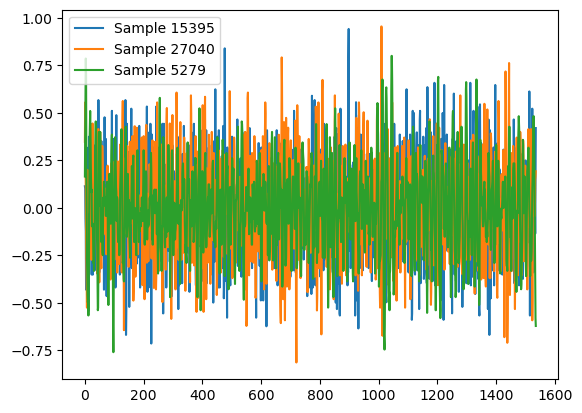

The number of rogue wave samples in the case with relative rogue wave ratio 0.3 is 11679.
The number of non-rogue wave samples in the case with relative rogue wave ratio 0.3 is 27252.
The total number of wave samples in the case with relative rogue wave ratio 0.3 is 38931.
(11679, 1536)
(27252, 1536)


25157
15579
23307


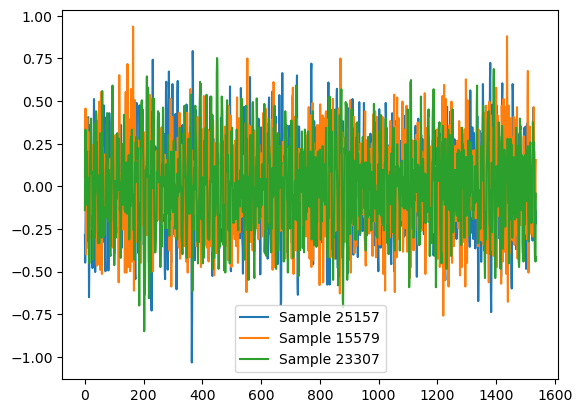

The number of rogue wave samples in the case with relative rogue wave ratio 0.4 is 18168.
The number of non-rogue wave samples in the case with relative rogue wave ratio 0.4 is 27252.
The total number of wave samples in the case with relative rogue wave ratio 0.4 is 45420.
(18168, 1536)
(27252, 1536)


18343
10583
235


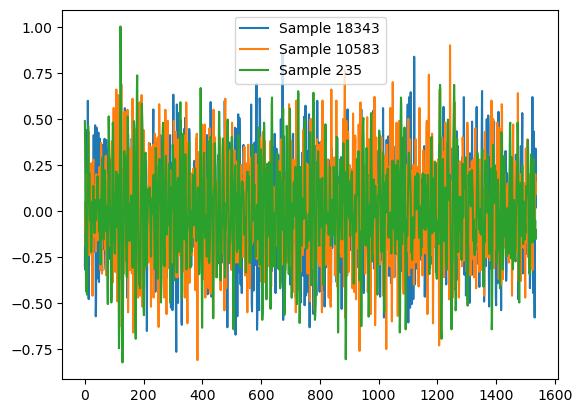

The number of rogue wave samples in the case with relative rogue wave ratio 0.5 is 27252.
The number of non-rogue wave samples in the case with relative rogue wave ratio 0.5 is 27252.
The total number of wave samples in the case with relative rogue wave ratio 0.5 is 54504.
(27252, 1536)
(27252, 1536)


13027
3631
7365


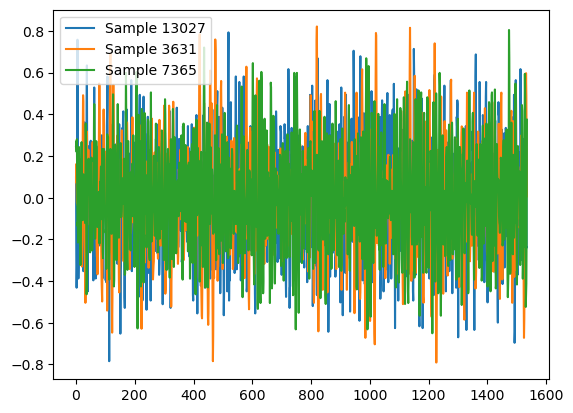

The number of rogue wave samples in the case with relative rogue wave ratio 0.6 is 27252.
The number of non-rogue wave samples in the case with relative rogue wave ratio 0.6 is 18168.
The total number of wave samples in the case with relative rogue wave ratio 0.6 is 45420.
(27252, 1536)
(18168, 1536)


26310
7509
8795


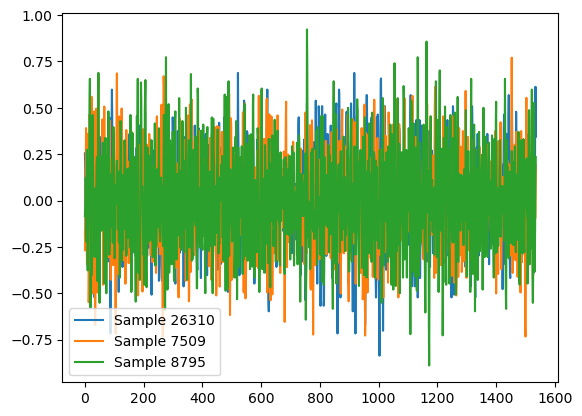

The number of rogue wave samples in the case with relative rogue wave ratio 0.7 is 27252.
The number of non-rogue wave samples in the case with relative rogue wave ratio 0.7 is 11679.
The total number of wave samples in the case with relative rogue wave ratio 0.7 is 38931.
(27252, 1536)
(11679, 1536)


21927
8939
6451


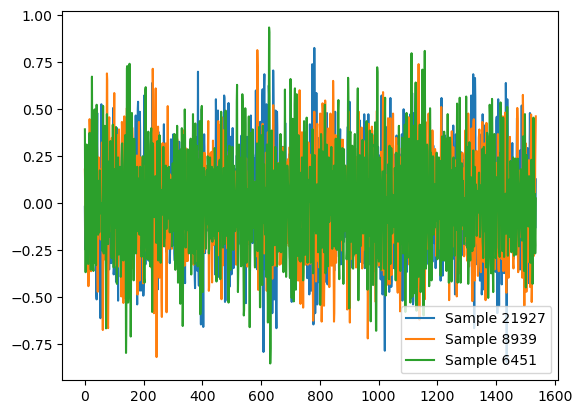

The number of rogue wave samples in the case with relative rogue wave ratio 0.8 is 27252.
The number of non-rogue wave samples in the case with relative rogue wave ratio 0.8 is 6813.
The total number of wave samples in the case with relative rogue wave ratio 0.8 is 34065.
(27252, 1536)
(6813, 1536)


5386
13060
20488


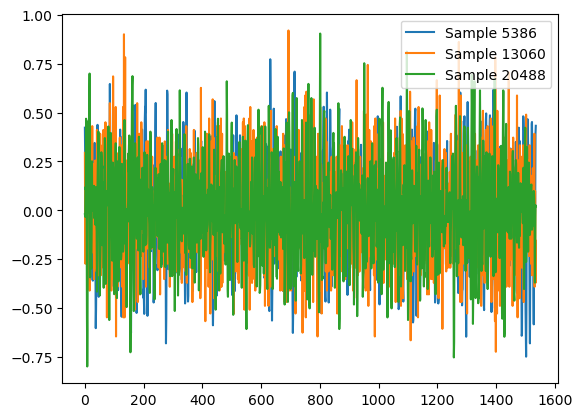

In [6]:
N_data=min([z_disp_rw.shape[0],z_disp_norw.shape[0]])#-1#-110001  #-1
relative_rw = [0.2, 0.3, 0.4, 0.5, 0.6 ,0.7, 0.8]

for i in range(len(relative_rw)):
    ratio = relative_rw[i]
    if ratio >= 0.5:
        num_rw = z_disp_rw.shape[0]
        num_norw = round(((1-ratio)/ratio) * num_rw)
    else:
        num_norw = z_disp_norw.shape[0]
        num_rw = round((ratio / (1-ratio))*num_norw)

    print(f"The number of rogue wave samples in the case with relative rogue wave ratio {ratio} is {num_rw}.")
    print(f"The number of non-rogue wave samples in the case with relative rogue wave ratio {ratio} is {num_norw}.")
    print(f"The total number of wave samples in the case with relative rogue wave ratio {ratio} is {num_rw + num_norw}.", end='\n') 
        
    z_disp_rw_altered = z_disp_rw[0:num_rw]
    z_disp_norw_altered = z_disp_norw[0:num_norw]
    
    print(z_disp_rw_altered.shape)
    print(z_disp_norw_altered.shape)
    print('\n')

    N_plots=3
    selected_samples=random.sample(range(0, len(z_disp_rw)), N_plots)

    plt.figure()
    for iter_plot in selected_samples:
        print(iter_plot)
        plt.plot(z_disp_rw[iter_plot,:], label='Sample '+str(iter_plot))

    plt.legend(loc='best')    
    plt.show()
    plt.close()

    wave_data=np.concatenate((z_disp_rw_altered, z_disp_norw_altered), axis=0)
    labels=np.concatenate(( np.ones(len(z_disp_rw_altered)) , np.zeros(len(z_disp_norw_altered))),axis=0)

    #wave_data_buoy_067=np.concatenate((z_disp_rw_buoy_067, z_disp_norw_buoy_067), axis=0)
    #labels_067=np.concatenate(( np.ones(len(z_disp_rw_buoy_067)) , np.zeros(len(z_disp_norw_buoy_067))),axis=0)

    idx = np.random.permutation(len(wave_data))
    wave_data = wave_data[idx]
    labels=labels[idx]


    wave_data_train=wave_data[0:round(0.8*len(wave_data))]
    wave_data_test=wave_data[round(0.8*len(wave_data))+1:]                                      

    label_train=labels[0:round(0.8*len(wave_data))]
    label_test=labels[round(0.8*len(wave_data))+1:]


    wave_data_train = wave_data_train.reshape((wave_data_train.shape[0], wave_data_train.shape[1], 1))
    wave_data_test = wave_data_test.reshape((wave_data_test.shape[0], wave_data_test.shape[1], 1))

    num_classes=2

    np.savez(os.getcwd()  +f'/DataPrepared/RWs_cH_g_1p25_tadv_5min_rw_{ratio}',wave_data_train=wave_data_train, wave_data_test=wave_data_test,label_train=label_train,label_test=label_test)